<a href="https://colab.research.google.com/github/nitink23/MY-ML/blob/master/adidas_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

In [11]:
df = pd.read_csv('/adidas_usa.csv')

In [12]:
df.head()

,index,url,name,sku,selling_price,original_price,currency,availability,color,category,...,source_website,breadcrumbs,description,brand,images,country,language,average_rating,reviews_count,crawled_at
0,0,https://www.adidas.com/us/beach-shorts/FJ5089....,Beach Shorts,FJ5089,40,NaN,USD,InStock,Black,Clothing,...,https://www.adidas.com,Women/Clothing,Splashing in the surf. Making memories with yo...,adidas,"https://assets.adidas.com/images/w_600,f_auto,...",USA,en,4.5,35,2021-10-23 17:50:17.331255
1,1,https://www.adidas.com/us/five-ten-kestrel-lac...,Five Ten Kestrel Lace Mountain Bike Shoes,BC0770,150,NaN,USD,InStock,Grey,Shoes,...,https://www.adidas.com,Women/Shoes,Lace up and get after it. The Five Ten Kestrel...,adidas,"https://assets.adidas.com/images/w_600,f_auto,...",USA,en,4.8,4,2021-10-23 17:50:17.423830
2,2,https://www.adidas.com/us/mexico-away-jersey/G...,Mexico Away Jersey,GC7946,70,NaN,USD,InStock,White,Clothing,...,https://www.adidas.com,Kids/Clothing,"Clean and crisp, this adidas Mexico Away Jerse...",adidas,"https://assets.adidas.com/images/w_600,f_auto,...",USA,en,4.9,42,2021-10-23 17:50:17.530834
3,3,https://www.adidas.com/us/five-ten-hiangle-pro...,Five Ten Hiangle Pro Competition Climbing Shoes,FV4744,160,NaN,USD,InStock,Black,Shoes,...,https://www.adidas.com,Five Ten/Shoes,The Hiangle Pro takes on the classic shape of ...,adidas,"https://assets.adidas.com/images/w_600,f_auto,...",USA,en,3.7,7,2021-10-23 17:50:17.615054
4,4,https://www.adidas.com/us/mesh-broken-stripe-p...,Mesh Broken-Stripe Polo Shirt,GM0239,65,NaN,USD,InStock,Blue,Clothing,...,https://www.adidas.com,Men/Clothing,Step up to the tee relaxed. This adidas golf p...,adidas,"https://assets.adidas.com/images/w_600,f_auto,...",USA,en,4.7,11,2021-10-23 17:50:17.702680


In [13]:
df.columns

Index(['index', 'url', 'name', 'sku', 'selling_price', 'original_price',
       'currency', 'availability', 'color', 'category', 'source',
       'source_website', 'breadcrumbs', 'description', 'brand', 'images',
       'country', 'language', 'average_rating', 'reviews_count', 'crawled_at'],
      dtype='object')

In [14]:
df.drop(['index','url'],axis = 1,inplace=True)

In [15]:

df.columns


Index(['name', 'sku', 'selling_price', 'original_price', 'currency',
       'availability', 'color', 'category', 'source', 'source_website',
       'breadcrumbs', 'description', 'brand', 'images', 'country', 'language',
       'average_rating', 'reviews_count', 'crawled_at'],
      dtype='object')

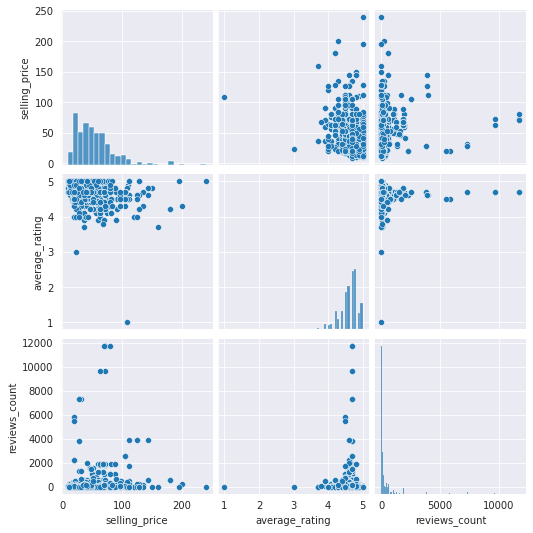

In [16]:
sns.pairplot(df)


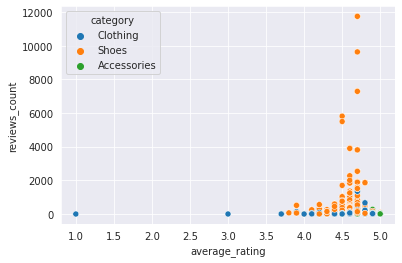

In [17]:
sns.scatterplot(x = df['average_rating'], y =df['reviews_count'],hue=df['category'] )

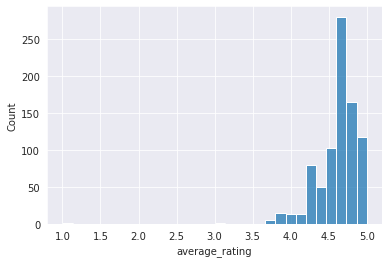

In [18]:
sns.histplot(df['average_rating'],bins = 30)

In [19]:
df.describe()


,selling_price,average_rating,reviews_count
count,845.000000,845.000000,845.000000
mean,53.192899,4.608402,426.178698
std,31.411645,0.293795,1229.158277
min,9.000000,1.000000,1.000000
25%,28.000000,4.500000,19.000000
50%,48.000000,4.700000,68.000000
75%,70.000000,4.800000,314.000000
max,240.000000,5.000000,11750.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


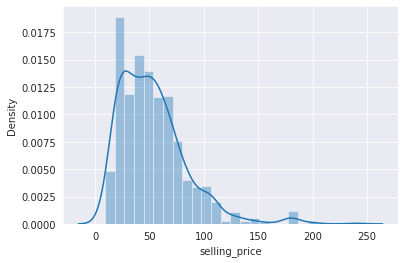

In [20]:
sns.distplot(df['selling_price'])
#unimodal since there is only one peak

In [21]:
np.mean(df['selling_price'])

53.19289940828402

In [22]:
np.median(df['selling_price'])

48.0

In [23]:
# since the median < mean the data is right skewed 
# the data of the selling price is right skewed.

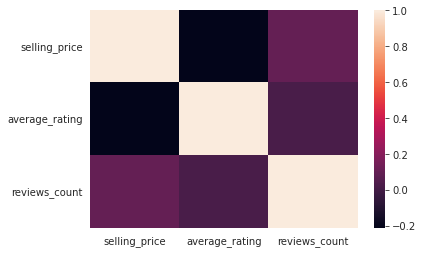

In [24]:
sns.heatmap(df.corr())

In [25]:
# we wouldn't be able to make a linear regression model successfully with this dataframe since correlations of most of these

In [26]:
# lets hot encode some of the columns

In [27]:
df.columns

Index(['name', 'sku', 'selling_price', 'original_price', 'currency',
       'availability', 'color', 'category', 'source', 'source_website',
       'breadcrumbs', 'description', 'brand', 'images', 'country', 'language',
       'average_rating', 'reviews_count', 'crawled_at'],
      dtype='object')

In [28]:
df['availability'].describe()

count         845
unique          2
top       InStock
freq          842
Name: availability, dtype: object

In [31]:
df['availability'].unique()

array(['InStock', 'OutOfStock'], dtype=object)

In [38]:
df['availability_encoded'] = df['availability'].apply(lambda x: 1 if x == 'InStock'else 0)

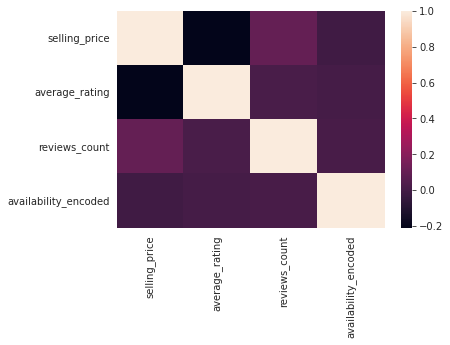

In [41]:
sns.heatmap(df.corr())

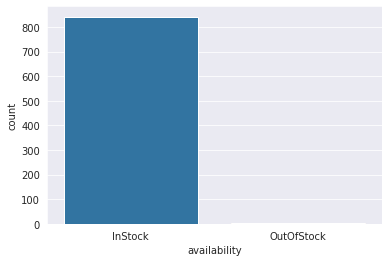

In [42]:
sns.countplot(x = df['availability'])

In [43]:
#everything is avalible so this data is very baised.